# Effect of exchange rate on production in manufacturing and government

Imports and set magics:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
pd.set_option('display.float_format', lambda x: '%.2f' % x) # formating
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings('ignore') # ignore unneccesary warnings later
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

**We import data from Statistics Denmark regarding production divided between industries and data regarding the effective exchange rate of the DKK**

In [38]:
GDP = DstApi('NKBP10')
EXRATE = DstApi('DNVALQ') 

# a. Tables of the variables
tabsum_GDP = GDP.tablesummary(language='en')
tabsum_EXRATE = EXRATE.tablesummary(language='en')
print('\n The production dataset contains the following variables:')
display(tabsum_GDP)
print('\n The exchangerate dataset contains the following variables:')
display(tabsum_EXRATE)


Table NKBP10: 1-2.1.1 Production
and  generation of income (10a3-grouping) by transaction, industry, price unit, seasonal adjustment and time
Last update: 2023-03-31T08:00:00
Table DNVALQ: Quarterly exchange rates by currency, type, methodology and time
Last update: 2023-03-30T08:00:00

 The production dataset contains the following variables:


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,7,P1K,P.1 Output,B2A3GD,B.2g+B.3g Gross operating surplus and mixed in...,False
1,BRANCHE,15,V,Total,VR_S,"R_S Arts, entertainment and other services",False
2,PRISENHED,2,V,Current prices,LKV,"2010-prices, chained values",False
3,SÆSON,2,N,Non-seasonally adjusted,Y,Seasonally adjusted,False
4,Tid,132,1990K1,1990Q1,2022K4,2022Q4,True



 The exchangerate dataset contains the following variables:


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,VALUTA,2,DKK,Nominal effective Krone rate (Jan. 1970-),X00,All currencies - excl. Danish kroner,False
1,KURTYP,4,INX,"Index (only nominal effective krone rate), ind...",RET,Real effective krone rate based on hourly earn...,False
2,OPGOER,3,A,Quarterly average,Y,Annual growth rate,False
3,Tid,212,1970K1,1970Q1,2022K4,2022Q4,True


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [41]:
# The available values for each variable in GDP dataset: 
for variable in tabsum_GDP['variable name']:
    print('The availabe values for '+variable+':')
    display(GDP.variable_levels(variable, language='en'))

The availabe values for TRANSAKT:


,id,text
0,P1K,P.1 Output
1,P2D,P.2 Intermediate consumption
2,B1GD,B.1g Gross value added
3,D29X39D,D.29-D.39 Other taxes less subsidies on produc...
4,B1GFD,B.1GF Gross domestic product at factor cost
5,D1D,D.1 Compensation of employees
6,B2A3GD,B.2g+B.3g Gross operating surplus and mixed in...


The availabe values for BRANCHE:


,id,text
0,V,Total
1,VMEMO,Of which: General government
2,VA,"A Agriculture, forestry and fishing"
3,VB,B Mining and quarrying
4,VC,C Manufacturing
5,VD_E,D_E Utility services
6,VF,F Construction
7,VG_I,G_I Trade and transport etc.
8,VJ,J Information and communication
9,VK,K Financial and insurance


The availabe values for PRISENHED:


,id,text
0,V,Current prices
1,LKV,"2010-prices, chained values"


The availabe values for SÆSON:


,id,text
0,N,Non-seasonally adjusted
1,Y,Seasonally adjusted


The availabe values for Tid:


,id,text
0,1990K1,1990Q1
1,1990K2,1990Q2
2,1990K3,1990Q3
3,1990K4,1990Q4
4,1991K1,1991Q1
...,...,...
127,2021K4,2021Q4
128,2022K1,2022Q1
129,2022K2,2022Q2
130,2022K3,2022Q3


In [42]:
# The available values for each variable in exchange rate dataset:
for variable in tabsum_EXRATE['variable name']:
    print('The availabe values for '+variable+':')
    display(EXRATE.variable_levels(variable, language='en'))

The availabe values for VALUTA:


,id,text
0,DKK,Nominal effective Krone rate (Jan. 1970-)
1,X00,All currencies - excl. Danish kroner


The availabe values for KURTYP:


,id,text
0,INX,"Index (only nominal effective krone rate), ind..."
1,LOI,"Hourly earnings in manufacturing in Denmark, s..."
2,LOU,Weighted hourly earnings in manufacturing abro...
3,RET,Real effective krone rate based on hourly earn...


The availabe values for OPGOER:


,id,text
0,A,Quarterly average
1,B,Calculated
2,Y,Annual growth rate


The availabe values for Tid:


,id,text
0,1970K1,1970Q1
1,1970K2,1970Q2
2,1970K3,1970Q3
3,1970K4,1970Q4
4,1971K1,1971Q1
...,...,...
207,2021K4,2021Q4
208,2022K1,2022Q1
209,2022K2,2022Q2
210,2022K3,2022Q3


**Defining parameters, joining and filtering data**

In [23]:
# a. define parameters
params_GDP = GDP._define_base_params(language='en')
params_EXRATE = EXRATE._define_base_params(language='en')

# b. load api
GDP_api = GDP.get_data(params=params_GDP)
EXRATE_api = EXRATE.get_data(params=params_EXRATE)

In [44]:
# a. left join data by TID
api = pd.merge(GDP_api, EXRATE_api, on='TID', how='left')
api.rename(columns = {'INDHOLD_x':'GDP', 'INDHOLD_y':'EXRATE'}, inplace=True)

# b. filter data
I = api.TRANSAKT.str.contains('P.1')
I &= api.PRISENHED.str.contains('Current prices')
I &= api.SÆSON.str.contains('Seasonally adjusted')
I &= api.VALUTA.str.contains('Nominal effective')
I &= api.KURTYP.str.contains('Index')
I &= api.OPGOER.str.contains('Quarterly')
I &= api.TID.str.contains('Q1')
api.loc[I, :]
api = api.loc[I == True]

# c. new indexing and atomic types
api.reset_index(inplace = True, drop = True)
api = api.apply(pd.to_numeric, errors='ignore')
api['TID'] = api['TID'].apply(pd.to_datetime, errors='ignore')

# d. show data
print('The first five values of the dataset:')
api.head(5)

The first five values of the dataset:


,TRANSAKT,BRANCHE,PRISENHED,SÆSON,TID,GDP,VALUTA,KURTYP,OPGOER,EXRATE
0,P.1 Output,Total,Current prices,Seasonally adjusted,2015-01-01,882620,Nominal effective Krone rate (Jan. 1970-),"Index (only nominal effective krone rate), ind...",Quarterly average,99.60
1,P.1 Output,"A Agriculture, forestry and fishing",Current prices,Seasonally adjusted,2015-01-01,19564,Nominal effective Krone rate (Jan. 1970-),"Index (only nominal effective krone rate), ind...",Quarterly average,99.60
2,P.1 Output,B Mining and quarrying,Current prices,Seasonally adjusted,2015-01-01,7236,Nominal effective Krone rate (Jan. 1970-),"Index (only nominal effective krone rate), ind...",Quarterly average,99.60
3,P.1 Output,C Manufacturing,Current prices,Seasonally adjusted,2015-01-01,169884,Nominal effective Krone rate (Jan. 1970-),"Index (only nominal effective krone rate), ind...",Quarterly average,99.60
4,P.1 Output,D_E Utility services,Current prices,Seasonally adjusted,2015-01-01,21873,Nominal effective Krone rate (Jan. 1970-),"Index (only nominal effective krone rate), ind...",Quarterly average,99.60


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [45]:
# descriptive statistics grouped by industries
print('Descriptive statistics for each industry:')
api.groupby(by=['BRANCHE'])['GDP'].describe()

Descriptive statistics for each industry:


,count,mean,std,min,25%,50%,75%,max
BRANCHE,,,,,,,,
"A Agriculture, forestry and fishing",33.00,17966.70,2796.50,14462.00,15971.00,16783.00,20737.00,25110.00
B Mining and quarrying,33.00,8610.79,5191.32,2412.00,3603.00,8171.00,12848.00,20516.00
C Manufacturing,33.00,143618.00,38458.92,89699.00,112730.00,137769.00,168562.00,231198.00
D_E Utility services,33.00,18060.39,5945.57,8489.00,12832.00,19790.00,21873.00,33924.00
F Construction,33.00,49044.48,18245.17,23319.00,36156.00,48351.00,60389.00,92423.00
G_I Trade and transport etc.,33.00,160834.12,66629.13,72380.00,102155.00,159708.00,206939.00,344282.00
J Information and communication,33.00,32094.27,13327.77,11702.00,19944.00,35007.00,40427.00,55943.00
K Financial and insurance,33.00,31365.67,11689.40,14826.00,19834.00,31495.00,41892.00,51294.00
LA Real estate activities and renting of non-residential buildings,33.00,14013.09,6060.96,5326.00,8580.00,14595.00,17750.00,26765.00


Plotting manufacturing and government against the effective exchange rate

Text(0.5, 1.0, 'Production in the manufacturing and government sectors')

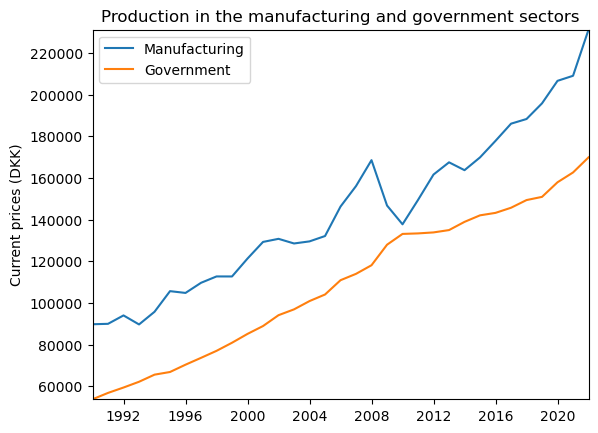

In [50]:
# a. sort values by time
api = api.sort_values(by='TID',ascending=True)

# b. define data to graph
man_plot = api.loc[api.BRANCHE.str.contains('Manufacturing') == True]
gov_plot = api.loc[api.BRANCHE.str.contains('Public administration, education and health') == True]

# c. plot in one graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(man_plot['TID'],man_plot['GDP'],label='Manufacturing')
ax.plot(gov_plot['TID'],gov_plot['GDP'],label='Government')
ax.margins(0,0)
ax.legend()
plt.ylabel('Current prices (DKK)')
plt.title('Production in the manufacturing and government sectors')

Text(0, 0.5, 'index=100, january 1970')

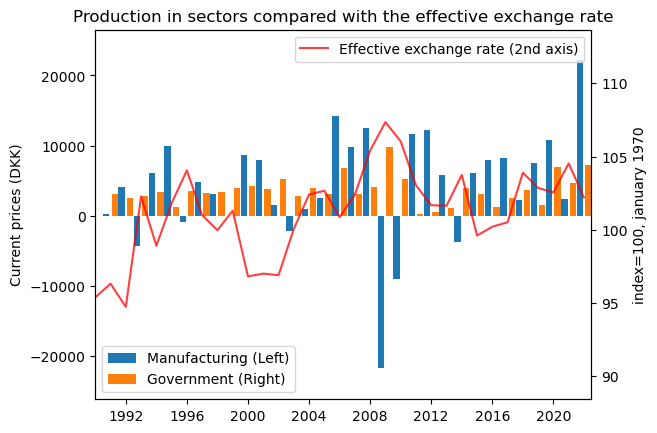

In [56]:
# a. calculating differences
man_plot['Diff'] = man_plot['GDP'].diff(periods=1)
gov_plot['Diff'] = gov_plot['GDP'].diff(periods=1)

# b. define empty plot with two axes
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

# c. plot the differences as bars and the exchange rate as a line
ax1.bar(height=man_plot['Diff'],x=date2num(man_plot['TID'])-100,width=150,label='Manufacturing (Left)')
ax1.bar(height=gov_plot['Diff'],x=date2num(gov_plot['TID'])+100,width=150,label='Government (Right)')
ax2.plot(date2num(man_plot['TID']),man_plot['EXRATE'],color='red',alpha=0.75, label='Effective exchange rate (2nd axis)')
ax1.xaxis_date()

# d. formatting
ax1.legend(loc=0)
ax2.legend(loc=0)
ax1.margins(0,0.1)
ax2.margins(0,0.5)
plt.title('Production in sectors compared with the effective exchange rate')
ax1.set_ylabel('Current prices (DKK)')
ax2.set_ylabel('index=100, january 1970')

# Conclusion

As seen above, production in the manufacturing sector is over the examined period much more volatile than the government sector, which is expected. We observe little to no correlation between production and the effective exchange rate. As Denmark is a small country, where our major tradingpartners use the Euro, it doesn't come as a surprise, as the Danish Krone is pegged to the Euro.